In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 6)


In [2]:
skill_freq = pd.read_csv("/content/skill_frequency_v1.csv")

skill_freq.head()


,skill,count
0,excel,40025
1,aws,23233
2,git,14815
3,sql,6322
4,python,5274


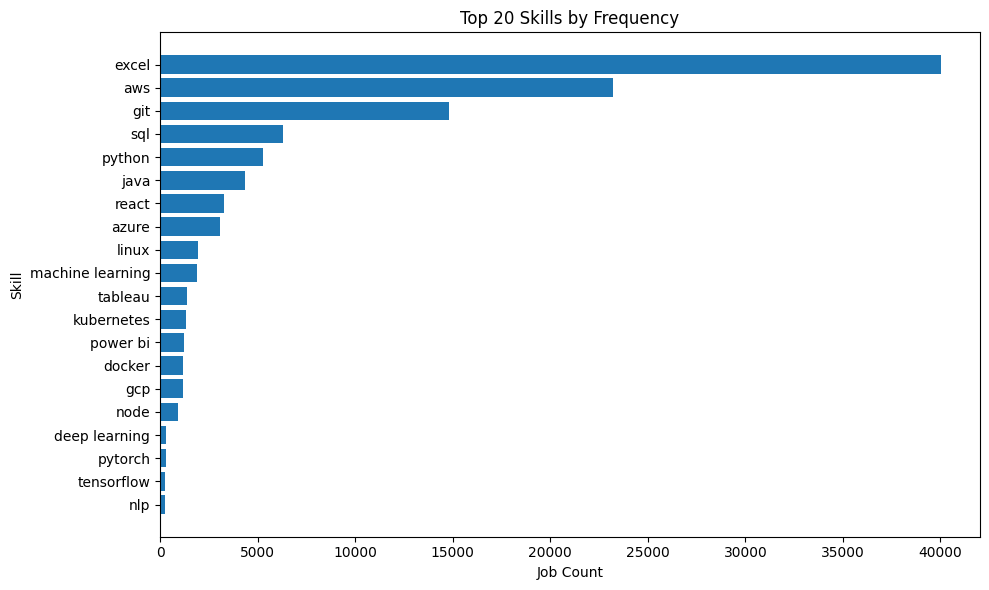

In [3]:
top_20 = skill_freq.sort_values("count", ascending=False).head(20)

plt.barh(top_20["skill"], top_20["count"])
plt.gca().invert_yaxis()
plt.title("Top 20 Skills by Frequency")
plt.xlabel("Job Count")
plt.ylabel("Skill")
plt.tight_layout()
plt.savefig("top_20_skills.png")
plt.show()


In [5]:
combined_canonical = pd.read_csv("/content/combined_canonical_v2.csv")

/tmp/ipython-input-678525892.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_canonical = pd.read_csv("/content/combined_canonical_v2.csv")


In [6]:
total_jobs = combined_canonical["job_id"].nunique()
total_jobs


129334

In [7]:
skill_freq["percentage"] = (skill_freq["count"] / total_jobs) * 100


In [8]:
skill_freq.sort_values("percentage", ascending=False).head()


,skill,count,percentage
0,excel,40025,30.947005
1,aws,23233,17.963567
2,git,14815,11.454838
3,sql,6322,4.888119
4,python,5274,4.077814


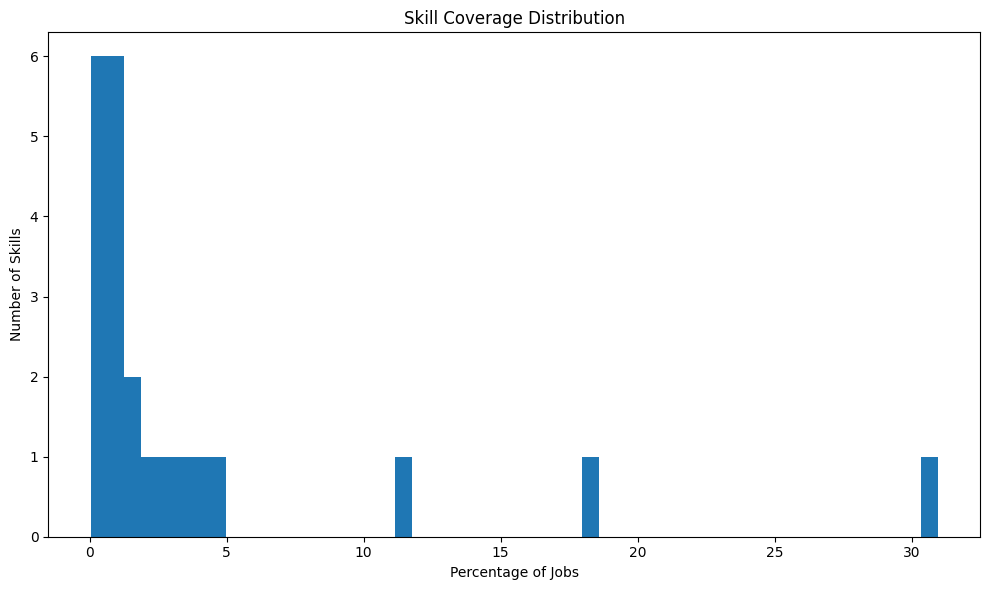

In [9]:
plt.hist(skill_freq["percentage"], bins=50)
plt.title("Skill Coverage Distribution")
plt.xlabel("Percentage of Jobs")
plt.ylabel("Number of Skills")
plt.tight_layout()
plt.savefig("skill_coverage_distribution.png")
plt.show()


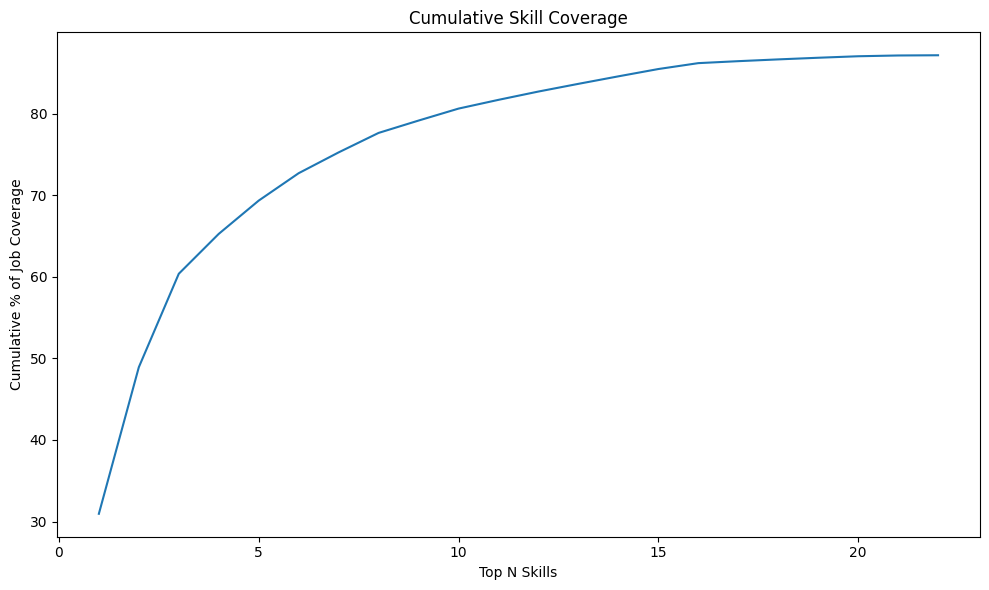

In [10]:
skill_freq_sorted = skill_freq.sort_values("percentage", ascending=False)
skill_freq_sorted["cumulative_coverage"] = skill_freq_sorted["percentage"].cumsum()

plt.plot(
    range(1, len(skill_freq_sorted) + 1),
    skill_freq_sorted["cumulative_coverage"]
)
plt.title("Cumulative Skill Coverage")
plt.xlabel("Top N Skills")
plt.ylabel("Cumulative % of Job Coverage")
plt.tight_layout()
plt.savefig("cumulative_skill_coverage.png")
plt.show()


### Interpretation

- A small number of skills dominate job postings, indicating strong market concentration.
- Skill demand is highly skewed, with most skills appearing in a very small fraction of jobs.
- The majority of skills form a long tail with limited individual impact.
- A relatively small set of core skills covers a large portion of job postings.
- Job seekers benefit more from mastering high-coverage skills than chasing niche ones.


## Salary vs Skill Count Analysis

### Load data

In [36]:
df = pd.read_csv("/content/combined_with_skills_norm_v1.csv")


/tmp/ipython-input-815355042.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/combined_with_skills_norm_v1.csv")


### Parse skills

In [37]:
import ast

def parse_skills(x):
    if isinstance(x, list):
        return x
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except:
            return []
    return []

df["skills_norm"] = df["skills_norm"].apply(parse_skills)
df["skill_count"] = df["skills_norm"].apply(len)


### Skill diagnostics

In [38]:
df["skill_count"].describe()


,skill_count
count,129334.000000
mean,0.871449
std,1.215776
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,14.000000


### Salary diagnostics

In [39]:
df["salary_final"].describe()


,salary_final
count,11772.000000
mean,50208.007205
std,66220.186748
min,0.000000
25%,22.000000
50%,2114.500000
75%,91478.500000
max,750000.000000


### Filter for analysis

In [40]:
df_salary = df[
    (df["salary_final"].notna()) &
    (df["salary_final"] > 10000) &
    (df["skill_count"] > 0)
]


### Scatter plot (raw relationship)

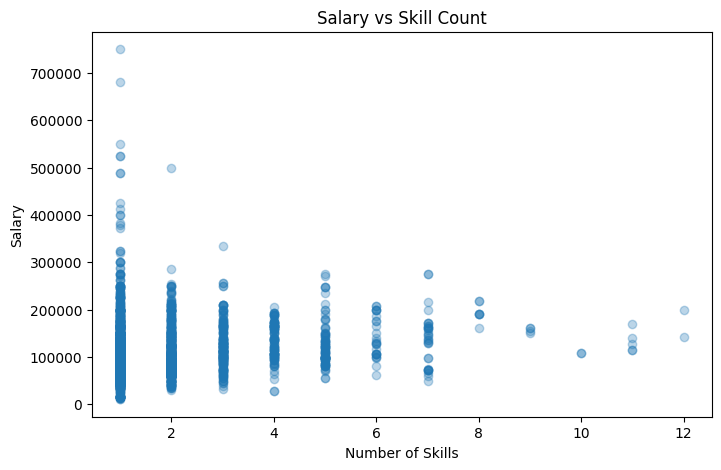

In [41]:
plt.figure(figsize=(8,5))
plt.scatter(df_salary["skill_count"], df_salary["salary_final"], alpha=0.3)
plt.xlabel("Number of Skills")
plt.ylabel("Salary")
plt.title("Salary vs Skill Count")
plt.show()


### Aggregation (core insight)

In [42]:
salary_by_skills = (
    df_salary.groupby("skill_count")["salary_final"]
    .mean()
    .reset_index()
)

salary_by_skills = salary_by_skills[salary_by_skills["skill_count"] <= 15]


### Trend plot

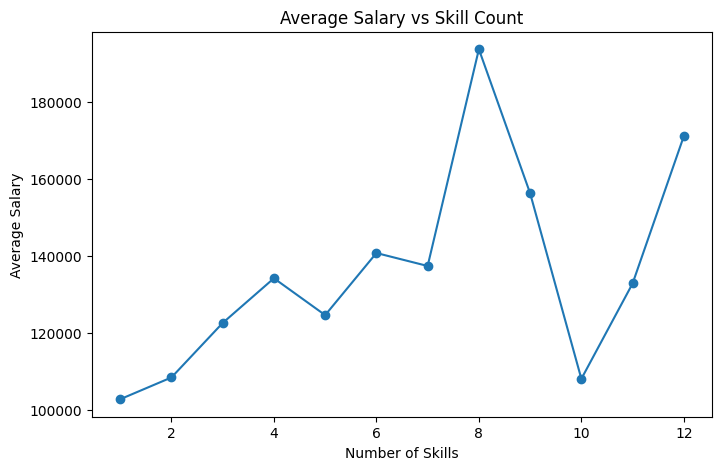

In [43]:
plt.figure(figsize=(8,5))
plt.plot(
    salary_by_skills["skill_count"],
    salary_by_skills["salary_final"],
    marker="o"
)
plt.xlabel("Number of Skills")
plt.ylabel("Average Salary")
plt.title("Average Salary vs Skill Count")

plt.savefig("salary_vs_skill_count.png", bbox_inches="tight")
plt.show()
